In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
import seaborn as sns
import matplotlib.pyplot as pyplot
from statistics import mode

In [12]:
adspend_trends = pd.read_csv('adspend.googletrends.weekly.csv', parse_dates=['FIXED TIME'])

In [13]:
adspend_trends.set_index('FIXED TIME', inplace=True)

In [14]:
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SYNDICATION',
 'TOTAL',
 'Unnamed: 0',
 'value',
 'onediffvalue',
 'TOTALdiff',
 'valuediff']

In [15]:
adspend_trends = adspend_trends.drop(columns=['onediffvalue', 'Unnamed: 0', 'TOTALdiff', 'valuediff'])

In [16]:
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SYNDICATION',
 'TOTAL',
 'value']

In [19]:
for acolumn in list(adspend_trends):
    adf_results = stattools.adfuller(adspend_trends[acolumn])
    print(adf_results[1])

3.3791311853282996e-07
0.0038259672408279596
0.0002320021957422997
8.791905734406244e-27
2.9987409119721522e-05
1.8113876761771767e-05
2.457816070789469e-14
0.013739831125602857
2.24411160183475e-14
0.2594174143129171
0.00011707969794838592
0.0016985171012903423


In [20]:
adspend_trends_diff = pd.DataFrame()

In [21]:
for acolumn in list(adspend_trends):
    columnname = "%s_diff" % (acolumn)
    adspend_trends_diff[columnname] = adspend_trends[acolumn].diff(1)

In [22]:
for acolumn in list(adspend_trends_diff):
    ads_result =stattools.adfuller(adspend_trends_diff[acolumn].iloc[1:])
    print(adf_results[1])

0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423
0.0016985171012903423


In [23]:
correlationlist = []
for acolumn in list(adspend_trends_diff):
    if "value" not in acolumn:
        corr = adspend_trends_diff[acolumn].corr(adspend_trends_diff['value_diff'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV_diff 0.13284453319983444
MAGAZINES_diff 0.1620289695316992
NAT SPOT RADIO_diff 0.07501475307681177
NATL NEWSP_diff 0.3068016163844794
NETWORK RADIO_diff 0.1785736458419488
NETWORK TV_diff 0.3792392754650202
NEWSPAPER_diff 0.2959777224219251
OUTDOOR_diff 0.09075283561417263
SPOT TV_diff 0.02160087499522598
SYNDICATION_diff 0.10086944988181933
TOTAL_diff 0.3862127939866372


In [24]:
np.mean(corr)

0.3862127939866372

In [26]:
correlationlist = []
for acolumn in list(adspend_trends):
    if "value" not in acolumn:
        corr = adspend_trends[acolumn].corr(adspend_trends['value'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV 0.40323152694397413
MAGAZINES 0.1695742160857613
NAT SPOT RADIO 0.19298093645939246
NATL NEWSP 0.12085697212319722
NETWORK RADIO 0.5318166394516398
NETWORK TV 0.1545903976498101
NEWSPAPER 0.3030625012216185
OUTDOOR 0.15354336294017645
SPOT TV 0.019422270230899076
SYNDICATION -0.11636134550607455
TOTAL 0.4179330581521476


In [27]:
np.mean(correlationlist)

0.21369550325023107

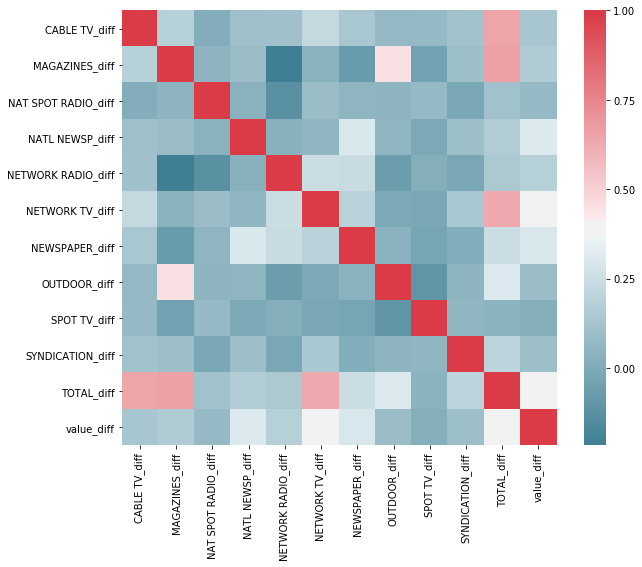

In [30]:
f, ax = pyplot.subplots(figsize=(10,8))
corr = adspend_trends_diff.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True), 
           square=True, ax=ax)

In [37]:
numofweeks = 8
significantlags = []
for acolumn in list(adspend_trends_diff):
    if 'value' not in acolumn:
        testframe = adspend_trends_diff[['value_diff', acolumn]]
        testframe = testframe.iloc[1:]
        results = stattools.grangercausalitytests(testframe, numofweeks, verbose=False)
        for week in range(1,numofweeks+1):
            if results[week][0]['params_ftest'][1] < .05:
                print('%s is significant at %s weeks' % (acolumn, week))
                significantlags.append(week)

CABLE TV_diff is significant at 2 weeks
CABLE TV_diff is significant at 3 weeks
CABLE TV_diff is significant at 4 weeks
CABLE TV_diff is significant at 5 weeks
CABLE TV_diff is significant at 6 weeks
CABLE TV_diff is significant at 7 weeks
CABLE TV_diff is significant at 8 weeks
MAGAZINES_diff is significant at 3 weeks
MAGAZINES_diff is significant at 4 weeks
MAGAZINES_diff is significant at 5 weeks
MAGAZINES_diff is significant at 6 weeks
MAGAZINES_diff is significant at 7 weeks
MAGAZINES_diff is significant at 8 weeks
NETWORK RADIO_diff is significant at 1 weeks
NETWORK RADIO_diff is significant at 2 weeks
NETWORK RADIO_diff is significant at 3 weeks
NETWORK RADIO_diff is significant at 4 weeks
NETWORK RADIO_diff is significant at 5 weeks
NETWORK RADIO_diff is significant at 6 weeks
NETWORK RADIO_diff is significant at 7 weeks
NETWORK RADIO_diff is significant at 8 weeks
NETWORK TV_diff is significant at 1 weeks
NETWORK TV_diff is significant at 2 weeks
NETWORK TV_diff is significant

In [38]:
mode(significantlags)

3

In [39]:
modelingdataset = adspend_trends_diff

In [40]:
modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,
2018-09-03,276.6,-1118.3,-0.4,0.0,142.5,1015.8,-223.8,-45.5,-1.8,0.0,45.2,-339.302444
2018-09-10,-623.1,0.0,0.0,0.0,0.0,540.9,0.0,0.0,-56.7,0.0,-139.0,-2095.423799
2018-09-17,-6.6,0.0,0.0,0.0,0.0,-635.8,0.0,0.0,0.5,0.0,-641.9,-230.226659
2018-09-24,-1205.3,0.0,0.0,0.0,0.0,233.2,0.0,0.0,-1.2,0.0,-973.3,-378.507035
2018-10-01,1996.3,2317.4,49.1,0.0,-301.5,-316.1,95.7,37.2,35.5,0.0,3913.7,-767.389362


In [42]:
date = pd.to_datetime('2018-10-08')
modelingdataset.loc[date] = np.nan

In [46]:
date = pd.to_datetime('2018-10-15')
modelingdataset.loc[date] = np.nan

In [47]:
date = pd.to_datetime('2018-10-22')
modelingdataset.loc[date] = np.nan

In [48]:
for acolumn in list(modelingdataset):
    if 'value' not in acolumn:
        for alag in range(1,4):
            columnname = '%s_lag%s' % (acolumn,alag)
            modelingdataset[columnname] = modelingdataset[acolumn].shift(alag)

In [49]:
modelingdataset.sort_index(axis=1, inplace=True)
modelingdataset.head()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag1_lag1,CABLE TV_diff_lag1_lag2,CABLE TV_diff_lag1_lag3,CABLE TV_diff_lag2,CABLE TV_diff_lag2_lag1,CABLE TV_diff_lag2_lag2,CABLE TV_diff_lag2_lag3,CABLE TV_diff_lag3,...,TOTAL_diff_lag1,TOTAL_diff_lag1_lag1,TOTAL_diff_lag1_lag2,TOTAL_diff_lag1_lag3,TOTAL_diff_lag2,TOTAL_diff_lag2_lag1,TOTAL_diff_lag2_lag2,TOTAL_diff_lag2_lag3,TOTAL_diff_lag3,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-94.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.929003
2013-10-21,990.6,-94.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-357.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.868195
2013-10-28,52.7,990.6,-94.7,NaN,NaN,-94.7,NaN,NaN,NaN,NaN,...,2775.4,-357.2,NaN,NaN,-357.2,NaN,NaN,NaN,NaN,89.532880
2013-11-04,-881.9,52.7,990.6,-94.7,NaN,990.6,-94.7,NaN,NaN,-94.7,...,3070.1,2775.4,-357.2,NaN,2775.4,-357.2,NaN,NaN,-357.2,902.483956


In [50]:
modelingdataset.to_csv('google_adspend_differenced_lagged_fordatarobot.csv')